✅ Bibliothèques importées avec succès
[2026-01-05 13:42:51] 🚀 Démarrage du pipeline de prétraitement
[2026-01-05 13:42:51] 📥 Chargement des données brutes...
[2026-01-05 13:42:51] ✅ Données chargées : 73,100 lignes × 15 colonnes
[2026-01-05 13:42:51] 📅 Période : 2022-01-01 à 2024-01-01

🔍 Aperçu des données brutes :


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer



📋 Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int

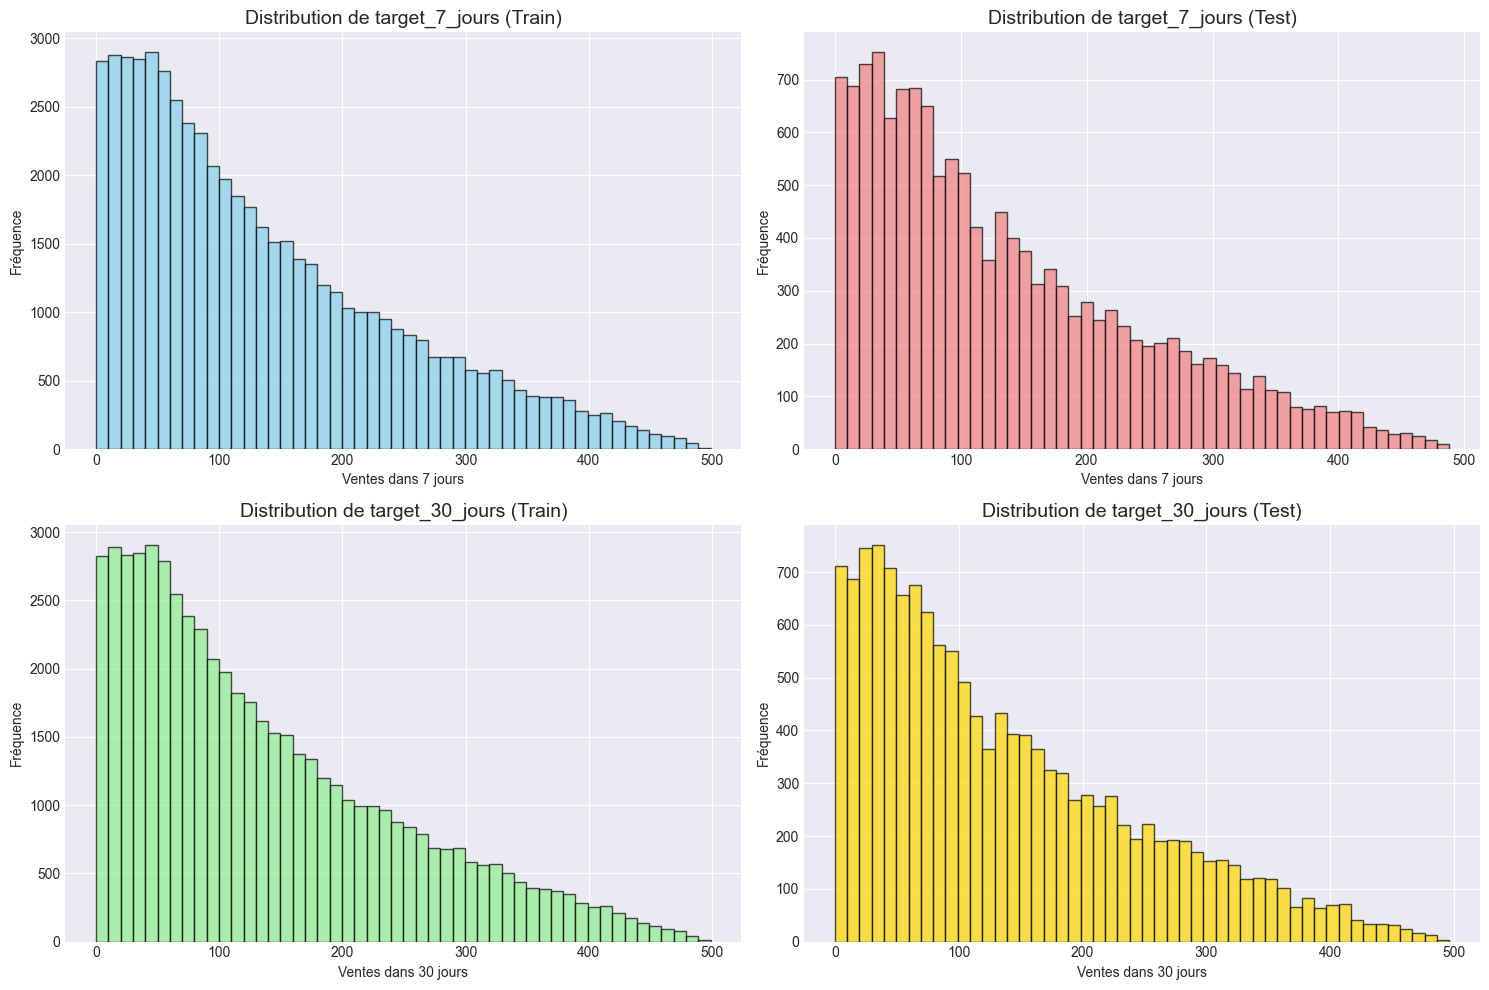

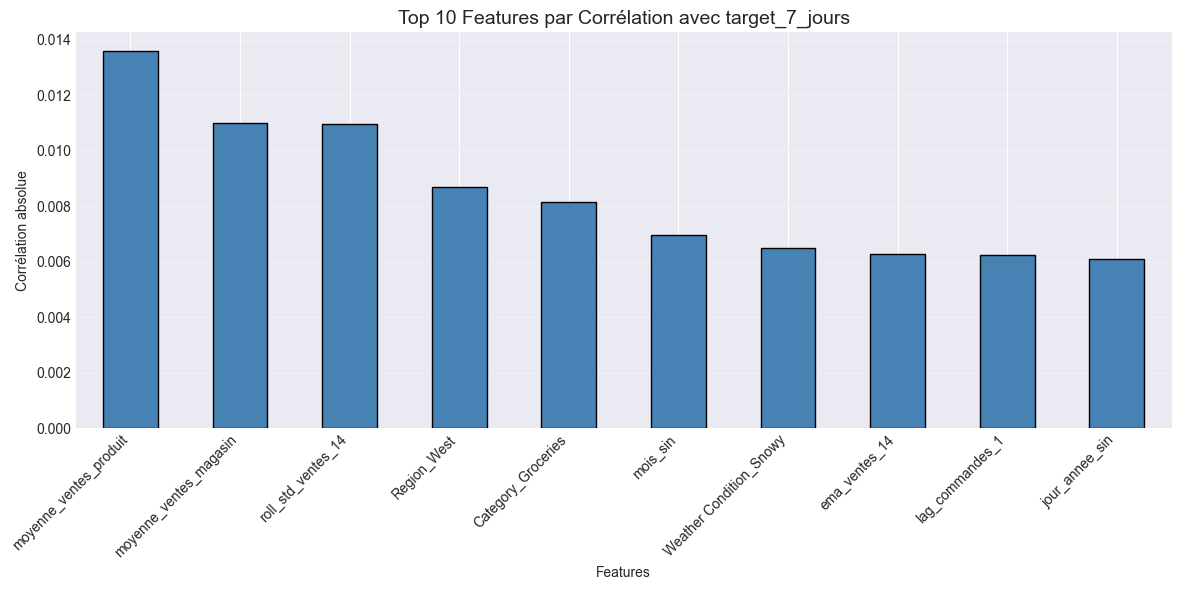

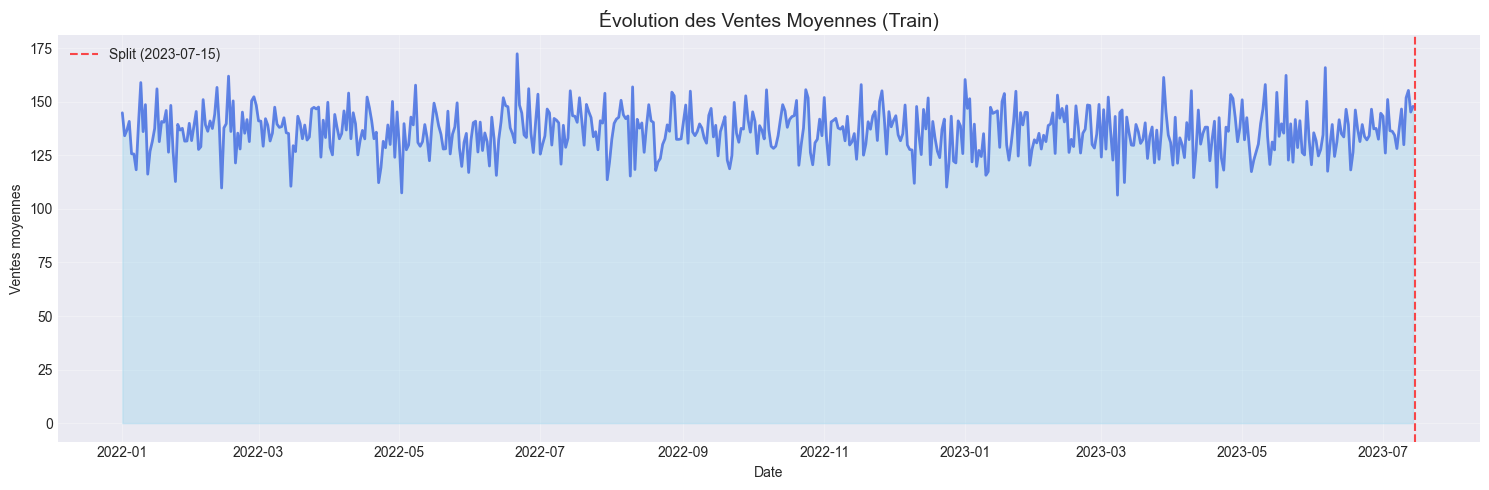

[2026-01-05 13:43:12] ✅ Visualisations générées et sauvegardées
[2026-01-05 13:43:12] 🔍 Validation finale de la qualité des données...

🔍 RAPPORT DE VALIDATION DES DONNÉES
✅ PASS     : Dimensions X_train_7
✅ PASS     : Dimensions y_train_7
✅ PASS     : Dimensions X_test_7
✅ PASS     : Dimensions y_test_7
✅ PASS     : NaN dans X_train_7
✅ PASS     : NaN dans y_train_7
✅ PASS     : NaN dans X_test_7
✅ PASS     : NaN dans y_test_7
✅ PASS     : Colonnes numériques
✅ PASS     : Produits communs train/test
✅ PASS     : Outliers dans y_train_7

📊 RÉSUMÉ : 11/11 tests passés
[2026-01-05 13:43:12] 🎉 TOUS LES TESTS DE VALIDATION SONT PASSÉS !

🎉 PIPELINE DE PRÉTRAITEMENT TERMINÉ AVEC SUCCÈS !
[2026-01-05 13:43:12] ============================================================
[2026-01-05 13:43:12] 🎉 PRÉTRAITEMENT TERMINÉ AVEC SUCCÈS !
[2026-01-05 13:43:12] ============================================================

📊 RÉSUMÉ FINAL DU PRÉTRAITEMENT :

📁 DONNÉES GÉNÉRÉES :
   • 8 datasets principau

In [4]:
# pretraitement_final.ipynb

# -*- coding: utf-8 -*-
"""
Pipeline Complet de Prétraitement pour Prédiction de Ventes
Objectif : Préparer les données pour l'apprentissage machine
Sorties : Datasets CSV prêts pour XGBoost, LightGBM, RandomForest, etc.
"""

# %% [markdown]
# # 🚀 Pipeline de Prétraitement pour Prédiction de Ventes
# 
# ## Objectifs
# 1. Charger et nettoyer les données brutes
# 2. Créer des features temporelles sans fuite de données
# 3. Préparer les datasets pour prédiction à 7 et 30 jours
# 4. Sauvegarder les données prêtes pour l'apprentissage
# 
# ## 📊 Structure des Sorties
# ```
# donnees_pretraitees/
# ├── X_train_7_jours.csv          # Features train (7 jours)
# ├── y_train_7_jours.csv          # Target train (7 jours)
# ├── X_test_7_jours.csv           # Features test (7 jours)
# ├── y_test_7_jours.csv           # Target test (7 jours)
# ├── X_train_30_jours.csv         # Features train (30 jours)
# ├── y_train_30_jours.csv         # Target train (30 jours)
# ├── X_test_30_jours.csv          # Features test (30 jours)
# ├── y_test_30_jours.csv          # Target test (30 jours)
# ├── dataset_complet_train.csv    # Dataset complet train
# ├── dataset_complet_test.csv     # Dataset complet test
# └── encodeurs/                   # Encoders pour nouvelles données
# ```
# 
# ## 🎯 Horizon de Prédiction
# - **Court terme** : 7 jours
# - **Moyen terme** : 30 jours

# %% [markdown]
# ## 1. 📚 Importation des Bibliothèques

# %%
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import pickle

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Bibliothèques importées avec succès")

# %% [markdown]
# ## 2. 📂 Configuration des Chemins

# %%
# Création des dossiers nécessaires
os.makedirs('./donnees_pretraitees', exist_ok=True)
os.makedirs('./donnees_pretraitees/encodeurs', exist_ok=True)
os.makedirs('./logs', exist_ok=True)

# Chemins des fichiers
CHEMIN_DONNEES_BRUTES = './data/retail_store_inventory.csv'
CHEMIN_SORTIE = './donnees_pretraitees/'

# Journalisation
def log_message(message):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    log_entry = f"[{timestamp}] {message}"
    print(log_entry)
    with open('./logs/pretraitement.log', 'a', encoding='utf-8') as f:
        f.write(log_entry + '\n')

log_message("🚀 Démarrage du pipeline de prétraitement")

# %% [markdown]
# ## 3. 📥 Chargement des Données Brutes

# %%
try:
    # Chargement avec gestion d'encodage
    log_message("📥 Chargement des données brutes...")
    df_raw = pd.read_csv(CHEMIN_DONNEES_BRUTES, encoding='ISO-8859-1')
    
    # Vérification basique
    log_message(f"✅ Données chargées : {df_raw.shape[0]:,} lignes × {df_raw.shape[1]} colonnes")
    log_message(f"📅 Période : {df_raw['Date'].min()} à {df_raw['Date'].max()}")
    
    # Aperçu
    print("\n🔍 Aperçu des données brutes :")
    display(df_raw.head())
    
    # Info sur les colonnes
    print("\n📋 Informations sur les colonnes :")
    df_raw.info()
    
except FileNotFoundError:
    log_message("❌ ERREUR : Fichier de données non trouvé")
    raise
except Exception as e:
    log_message(f"❌ ERREUR lors du chargement : {str(e)}")
    raise

# %% [markdown]
# ## 4. 🧹 Nettoyage de Base

# %%
log_message("🧹 Début du nettoyage de base...")

# Copie pour sécurité
df = df_raw.copy()

# 4.1 Conversion de la date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
log_message(f"✅ Dates converties. Période : {df['Date'].min()} à {df['Date'].max()}")

# 4.2 Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]

if len(missing_cols) > 0:
    log_message(f"⚠️  Valeurs manquantes détectées :")
    for col, count in missing_cols.items():
        log_message(f"   • {col}: {count} valeurs ({count/len(df)*100:.2f}%)")
    
    # Stratégie de remplissage
    for col in missing_cols.index:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')
        else:
            df[col] = df[col].fillna(df[col].median())
    log_message("✅ Valeurs manquantes traitées")
else:
    log_message("✅ Aucune valeur manquante détectée")

# 4.3 Suppression des doublons
initial_rows = len(df)
df = df.drop_duplicates()
final_rows = len(df)
duplicates_removed = initial_rows - final_rows

if duplicates_removed > 0:
    log_message(f"🧹 {duplicates_removed} doublons supprimés")
else:
    log_message("✅ Aucun doublon détecté")

# 4.4 Vérification des types de données
log_message("🔍 Vérification des types de données...")
print("\n📊 Types de données par colonne :")
print(df.dtypes.value_counts())

# %% [markdown]
# ## 5. 📅 Feature Engineering Temporel

# %%
log_message("📅 Création des features temporelles...")

# 5.1 Features temporelles de base
df['annee'] = df['Date'].dt.year
df['mois'] = df['Date'].dt.month
df['semaine_annee'] = df['Date'].dt.isocalendar().week.astype(int)
df['trimestre'] = df['Date'].dt.quarter
df['jour_semaine'] = df['Date'].dt.dayofweek
df['jour_mois'] = df['Date'].dt.day
df['jour_annee'] = df['Date'].dt.dayofyear
df['est_weekend'] = (df['jour_semaine'] >= 5).astype(int)
df['debut_mois'] = df['Date'].dt.is_month_start.astype(int)
df['fin_mois'] = df['Date'].dt.is_month_end.astype(int)

# 5.2 Encodage cyclique (sin/cos) pour les patterns saisonniers
def encode_cyclique(df, colonne, periode):
    df[f'{colonne}_sin'] = np.sin(2 * np.pi * df[colonne] / periode)
    df[f'{colonne}_cos'] = np.cos(2 * np.pi * df[colonne] / periode)
    return df

# Encodage pour la semaine (période 7) et l'année (période 365.25)
df = encode_cyclique(df, 'jour_semaine', 7)
df = encode_cyclique(df, 'jour_annee', 365.25)
df = encode_cyclique(df, 'mois', 12)

# 5.3 Features avancées
df['est_dernier_jour_semaine'] = (df['jour_semaine'] == 4).astype(int)  # Vendredi
df['est_premier_jour_semaine'] = (df['jour_semaine'] == 0).astype(int)  # Lundi

# Comptage des jours depuis début de l'année
df['jours_depuis_debut_annee'] = (df['Date'] - pd.to_datetime(df['annee'].astype(str) + '-01-01')).dt.days

log_message(f"✅ {len([c for c in df.columns if 'jour' in c or 'mois' in c or 'semaine' in c])} features temporelles créées")

# %% [markdown]
# ## 6. 🔄 Lag Features (Sans Fuite de Données)

# %%
log_message("🔄 Création des lag features...")

# Tri chronologique par produit et magasin
df = df.sort_values(['Store ID', 'Product ID', 'Date']).reset_index(drop=True)

# Lags multiples (1, 2, 3, 7, 14, 30 jours)
# ...existing code...
# Lags multiples (1, 2, 3, 7, 14, 30)
lags = [1, 2, 3, 7, 14, 30]

for lag in lags:
    # Lag des ventes
    df[f'lag_ventes_{lag}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(lag)

    # Lag des commandes
    df[f'lag_commandes_{lag}'] = df.groupby(['Store ID', 'Product ID'])['Units Ordered'].shift(lag)

    # Lag du stock
    df[f'lag_stock_{lag}'] = df.groupby(['Store ID', 'Product ID'])['Inventory Level'].shift(lag)

# Différences entre lags et ratios (utilise le lag suivant disponible)
for lag in [1, 7]:
    df[f'diff_ventes_{lag}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].diff(lag)

    # Trouver le next lag dans la liste lags (si existant) pour éviter de référencer un lag non créé
    try:
        next_lag = lags[lags.index(lag) + 1]
    except (ValueError, IndexError):
        next_lag = None

    if next_lag is not None:
        df[f'ratio_ventes_{lag}'] = df[f'lag_ventes_{lag}'] / (df[f'lag_ventes_{next_lag}'] + 1)
    else:
        # fallback : comparer au niveau actuel moyen pour éviter division par une colonne inexistante
        df[f'ratio_ventes_{lag}'] = df[f'lag_ventes_{lag}'] / (df['Units Sold'].rolling(lag + 1, min_periods=1).mean().shift(1) + 1)

log_message(f"✅ {len(lags) * 3} lag features créées")

# %% [markdown]
# ## 7. 📊 Rolling Statistics (Sans Fuite)

# %%
log_message("📊 Création des statistiques glissantes...")

# Fenêtres pour les rolling stats
fenetres = [7, 14, 30]

for fenetre in fenetres:
    # Moyenne glissante (sans fuite - shift(1))
    df[f'roll_mean_ventes_{fenetre}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'] \
        .transform(lambda x: x.shift(1).rolling(fenetre, min_periods=int(fenetre/2)).mean())
    
    # Écart-type glissante
    df[f'roll_std_ventes_{fenetre}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'] \
        .transform(lambda x: x.shift(1).rolling(fenetre, min_periods=int(fenetre/2)).std())
    
    # Min/Max glissants
    df[f'roll_min_ventes_{fenetre}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'] \
        .transform(lambda x: x.shift(1).rolling(fenetre, min_periods=int(fenetre/2)).min())
    
    df[f'roll_max_ventes_{fenetre}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'] \
        .transform(lambda x: x.shift(1).rolling(fenetre, min_periods=int(fenetre/2)).max())
    
    # Z-score local
    df[f'zscore_ventes_{fenetre}'] = (df['lag_ventes_1'] - df[f'roll_mean_ventes_{fenetre}']) / (df[f'roll_std_ventes_{fenetre}'] + 1e-6)

# Moyenne mobile exponentielle (EMA)
df['ema_ventes_7'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'] \
    .transform(lambda x: x.shift(1).ewm(span=7, min_periods=3).mean())

df['ema_ventes_14'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'] \
    .transform(lambda x: x.shift(1).ewm(span=14, min_periods=7).mean())

log_message(f"✅ {len(fenetres) * 5 + 2} rolling features créées")

# %% [markdown]
# ## 8. 🎯 Target Engineering

# %%
log_message("🎯 Création des targets (7 et 30 jours)...")

# Target pour 7 jours (ventes dans 7 jours)
df['target_7_jours'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(-7)

# Target pour 30 jours (ventes dans 30 jours)
df['target_30_jours'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(-30)

# Target ratio (pour classification ou régularisation)
df['target_ratio_7'] = df['target_7_jours'] / (df['Units Sold'] + 1)
df['target_ratio_30'] = df['target_30_jours'] / (df['Units Sold'] + 1)

# Target binaire (augmentation vs diminution)
df['target_binaire_7'] = (df['target_7_jours'] > df['Units Sold']).astype(int)
df['target_binaire_30'] = (df['target_30_jours'] > df['Units Sold']).astype(int)

log_message("✅ Targets créées pour 7 et 30 jours")

# Vérification des targets
print("\n📊 Statistiques des targets :")
print(f"• Target 7 jours: Min={df['target_7_jours'].min():.0f}, Max={df['target_7_jours'].max():.0f}, Moyenne={df['target_7_jours'].mean():.2f}")
print(f"• Target 30 jours: Min={df['target_30_jours'].min():.0f}, Max={df['target_30_jours'].max():.0f}, Moyenne={df['target_30_jours'].mean():.2f}")

# %% [markdown]
# ## 9. 💰 Features Commerciales

# %%
log_message("💰 Création des features commerciales...")

# 9.1 Features de prix
df['prix_apres_remise'] = df['Price'] * (1 - df['Discount'] / 100)
df['ratio_prix_concurrent'] = df['Price'] / (df['Competitor Pricing'] + 1e-6)
df['diff_prix_concurrent'] = df['Price'] - df['Competitor Pricing']

# 9.2 Features de promotion
df['promotion_active'] = (df['Discount'] > 0).astype(int)
df['intensite_promotion'] = df['Discount'] / 100
df['categorie_promotion'] = pd.cut(df['Discount'], 
                                   bins=[-1, 0, 10, 20, 30, 101], 
                                   labels=['Pas_promo', 'Petite', 'Moyenne', 'Forte', 'Très_forte'])

# 9.3 Features de stock et demande
df['ratio_stock_demande'] = df['Inventory Level'] / (df['Demand Forecast'] + 1)
df['risque_rupture'] = (df['Inventory Level'] < df['roll_mean_ventes_7']).astype(int)
df['surstock'] = (df['Inventory Level'] > 3 * df['roll_mean_ventes_7']).astype(int)

# 9.4 Features de performance
df['precision_prevision'] = 1 - (abs(df['Units Sold'] - df['Demand Forecast']) / (df['Units Sold'] + 1))
df['ratio_commandes_ventes'] = df['Units Ordered'] / (df['Units Sold'] + 1)

log_message("✅ Features commerciales créées")

# %% [markdown]
# ## 10. 🌤️ Features Externes

# %%
log_message("🌤️ Encodage des features externes...")

# 10.1 Encodage de la météo
mapping_meteo = {
    'Sunny': 0,
    'Cloudy': 1, 
    'Rainy': 2,
    'Snowy': 3,
    'Stormy': 4
}
df['meteo_encodee'] = df['Weather Condition'].map(mapping_meteo).fillna(0)

# 10.2 Features saisonnières
mapping_saison = {
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Autumn': 3
}
df['saison_encodee'] = df['Seasonality'].map(mapping_saison).fillna(0)

# 10.3 Indicateurs spéciaux
df['est_jour_ferie'] = df['Holiday/Promotion'].astype(int)
df['est_periode_speciale'] = ((df['Holiday/Promotion'] == 1) | 
                              (df['meteo_encodee'].isin([3, 4]))).astype(int)

log_message("✅ Features externes encodées")

# %% [markdown]
# ## 11. 🏷️ Préparation pour l'Encodage

# %%
log_message("🏷️ Préparation des variables catégorielles...")

# Liste des colonnes catégorielles
colonnes_categoriques = ['Category', 'Region', 'Weather Condition', 'Seasonality']

# Vérification
for col in colonnes_categoriques:
    if col in df.columns:
        log_message(f"  • {col}: {df[col].nunique()} valeurs uniques")
    else:
        log_message(f"⚠️  Colonne {col} non trouvée")

# Stockage des IDs originaux (pour référence)
df['Product_ID_original'] = df['Product ID']
df['Store_ID_original'] = df['Store ID']

# Calcul des moyennes par produit et magasin (pour target encoding)
moyenne_ventes_produit = df.groupby('Product ID')['Units Sold'].mean().to_dict()
moyenne_ventes_magasin = df.groupby('Store ID')['Units Sold'].mean().to_dict()

df['moyenne_ventes_produit'] = df['Product ID'].map(moyenne_ventes_produit)
df['moyenne_ventes_magasin'] = df['Store ID'].map(moyenne_ventes_magasin)

log_message("✅ Variables catégorielles préparées")

# %% [markdown]
# ## 12. 🧹 Gestion des Valeurs Manquantes Finale

# %%
log_message("🧹 Gestion finale des valeurs manquantes...")

# Identification des colonnes avec NaN
nan_avant = df.isnull().sum().sum()
colonnes_avec_nan = df.columns[df.isnull().any()].tolist()

if len(colonnes_avec_nan) > 0:
    log_message(f"⚠️  {nan_avant} valeurs NaN dans {len(colonnes_avec_nan)} colonnes")
    
    # Stratégie par type de colonne
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            nan_count = df[col].isnull().sum()
            pourcentage = (nan_count / len(df)) * 100
            
            if pourcentage > 30:
                # Trop de NaN, on supprime la colonne
                log_message(f"  • Suppression de {col} ({pourcentage:.1f}% NaN)")
                df = df.drop(columns=[col])
            else:
                # Remplissage intelligent
                if 'target' in col:
                    # Pour les targets, on supprime les lignes
                    df = df.dropna(subset=[col])
                elif 'lag' in col or 'roll' in col:
                    # Pour les features temporelles, backward fill par groupe
                    df[col] = df.groupby(['Store ID', 'Product ID'])[col].bfill()
                elif df[col].dtype in ['float64', 'int64']:
                    # Pour les numériques, médiane par groupe
                    df[col] = df.groupby(['Store ID', 'Product ID'])[col].transform(
                        lambda x: x.fillna(x.median())
                    )
                else:
                    # Pour les autres, mode par groupe
                    df[col] = df.groupby(['Store ID', 'Product ID'])[col].transform(
                        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
                    )
    
    nan_apres = df.isnull().sum().sum()
    log_message(f"✅ NaN réduits de {nan_avant} à {nan_apres}")
else:
    log_message("✅ Aucune valeur NaN détectée")

# Suppression des lignes où les targets sont manquantes (dernières dates)
lignes_avant = len(df)
df = df.dropna(subset=['target_7_jours', 'target_30_jours'])
lignes_apres = len(df)
lignes_supprimees = lignes_avant - lignes_apres

log_message(f"🧹 {lignes_supprimees} lignes supprimées (targets manquantes)")

# %% [markdown]
# ## 13. 📊 Split Temporel (80/20)

# %%
log_message("📊 Split temporel des données (80% train / 20% test)...")

# Tri chronologique final
df = df.sort_values('Date').reset_index(drop=True)

# Date de split (80% pour train)
split_index = int(len(df) * 0.8)
split_date = df.iloc[split_index]['Date']

# Split
df_train = df[df['Date'] < split_date].copy()
df_test = df[df['Date'] >= split_date].copy()

# Statistiques
log_message(f"📅 Date de split : {split_date}")
log_message(f"📈 Dataset Train : {len(df_train):,} lignes ({df_train['Date'].min()} à {df_train['Date'].max()})")
log_message(f"📊 Dataset Test  : {len(df_test):,} lignes ({df_test['Date'].min()} à {df_test['Date'].max()})")
log_message(f"📋 Ratio : {len(df_train)/len(df)*100:.1f}% train, {len(df_test)/len(df)*100:.1f}% test")

# Vérification qu'il n'y a pas de chevauchement
if df_train['Date'].max() >= df_test['Date'].min():
    log_message("⚠️  ATTENTION : Chevauchement détecté entre train et test !")
else:
    log_message("✅ Aucun chevauchement entre train et test")

# %% [markdown]
# ## 14. 🔤 Encodage des Variables Catégorielles (Après Split)

# %%
log_message("🔤 Encodage des variables catégorielles...")

# 14.1 Encodage des IDs (Label Encoding pour préserver l'ordre)
log_message("  • Encodage des Product ID et Store ID...")

# Product ID
product_encoder = LabelEncoder()
df_train['Product_ID_encoded'] = product_encoder.fit_transform(df_train['Product ID'])
df_test['Product_ID_encoded'] = df_test['Product ID'].apply(
    lambda x: product_encoder.transform([x])[0] if x in product_encoder.classes_ else -1
)

# Store ID
store_encoder = LabelEncoder()
df_train['Store_ID_encoded'] = store_encoder.fit_transform(df_train['Store ID'])
df_test['Store_ID_encoded'] = df_test['Store ID'].apply(
    lambda x: store_encoder.transform([x])[0] if x in store_encoder.classes_ else -1
)

log_message(f"    ✅ Product ID : {len(product_encoder.classes_)} produits encodés")
log_message(f"    ✅ Store ID : {len(store_encoder.classes_)} magasins encodés")

# 14.2 One-Hot Encoding pour les autres catégories
log_message("  • One-Hot Encoding des autres catégories...")

# Colonnes à encoder
colonnes_a_encoder = [col for col in colonnes_categoriques if col in df_train.columns]

if colonnes_a_encoder:
    onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    
    # Fit sur train seulement
    train_encoded = onehot_encoder.fit_transform(df_train[colonnes_a_encoder])
    test_encoded = onehot_encoder.transform(df_test[colonnes_a_encoder])
    
    # Création des DataFrames encodés
    encoded_cols = onehot_encoder.get_feature_names_out(colonnes_a_encoder)
    
    df_train_encoded = pd.DataFrame(train_encoded, columns=encoded_cols, index=df_train.index)
    df_test_encoded = pd.DataFrame(test_encoded, columns=encoded_cols, index=df_test.index)
    
    # Concaténation
    df_train = pd.concat([df_train, df_train_encoded], axis=1)
    df_test = pd.concat([df_test, df_test_encoded], axis=1)
    
    log_message(f"    ✅ {len(encoded_cols)} colonnes one-hot créées")
else:
    log_message("    ⚠️  Aucune colonne catégorielle à encoder")

# 14.3 Sauvegarde des encodeurs
log_message("  • Sauvegarde des encodeurs...")

with open(f'{CHEMIN_SORTIE}encodeurs/product_encoder.pkl', 'wb') as f:
    pickle.dump(product_encoder, f)

with open(f'{CHEMIN_SORTIE}encodeurs/store_encoder.pkl', 'wb') as f:
    pickle.dump(store_encoder, f)

if 'onehot_encoder' in locals():
    with open(f'{CHEMIN_SORTIE}encodeurs/onehot_encoder.pkl', 'wb') as f:
        pickle.dump(onehot_encoder, f)

log_message("✅ Encodage terminé et encodeurs sauvegardés")

# %% [markdown]
# ## 15. 🎯 Préparation des Datasets Finaux

# %%
log_message("🎯 Préparation des datasets finaux...")

# 15.1 Liste des colonnes à conserver
colonnes_a_conserver = [
    # Identifiants encodés
    'Product_ID_encoded', 'Store_ID_encoded',
    'moyenne_ventes_produit', 'moyenne_ventes_magasin',
    
    # Features temporelles
    'annee', 'mois', 'semaine_annee', 'trimestre', 'jour_semaine',
    'est_weekend', 'debut_mois', 'fin_mois',
    'jour_semaine_sin', 'jour_semaine_cos',
    'jour_annee_sin', 'jour_annee_cos',
    'mois_sin', 'mois_cos',
    
    # Lag features
    'lag_ventes_1', 'lag_ventes_7', 'lag_ventes_14', 'lag_ventes_30',
    'lag_commandes_1', 'lag_stock_1',
    'diff_ventes_1', 'ratio_ventes_1',
    
    # Rolling features
    'roll_mean_ventes_7', 'roll_std_ventes_7',
    'roll_mean_ventes_14', 'roll_std_ventes_14',
    'zscore_ventes_7', 'zscore_ventes_14',
    'ema_ventes_7', 'ema_ventes_14',
    
    # Features commerciales
    'prix_apres_remise', 'ratio_prix_concurrent', 'diff_prix_concurrent',
    'promotion_active', 'intensite_promotion',
    'ratio_stock_demande', 'risque_rupture', 'surstock',
    'precision_prevision', 'ratio_commandes_ventes',
    
    # Features externes
    'meteo_encodee', 'saison_encodee',
    'est_jour_ferie', 'est_periode_speciale',
    
    # Targets
    'target_7_jours', 'target_30_jours',
    'target_ratio_7', 'target_ratio_30',
    'target_binaire_7', 'target_binaire_30'
]

# Ajouter les colonnes one-hot si elles existent
if 'onehot_encoder' in locals():
    colonnes_onehot = [col for col in df_train.columns if any(x in col for x in colonnes_a_encoder)]
    colonnes_a_conserver.extend(colonnes_onehot)

# Filtrer pour ne garder que les colonnes qui existent
colonnes_existantes = [col for col in colonnes_a_conserver if col in df_train.columns]
colonnes_manquantes = [col for col in colonnes_a_conserver if col not in df_train.columns]

if colonnes_manquantes:
    log_message(f"⚠️  Colonnes manquantes : {colonnes_manquantes[:5]}...")

# 15.2 Création des datasets finaux
df_train_final = df_train[colonnes_existantes].copy()
df_test_final = df_test[colonnes_existantes].copy()

log_message(f"✅ Datasets finaux créés :")
log_message(f"   • Train : {df_train_final.shape[0]:,} lignes × {df_train_final.shape[1]} colonnes")
log_message(f"   • Test  : {df_test_final.shape[0]:,} lignes × {df_test_final.shape[1]} colonnes")

# 15.3 Vérification finale des NaN
nan_train = df_train_final.isnull().sum().sum()
nan_test = df_test_final.isnull().sum().sum()

if nan_train == 0 and nan_test == 0:
    log_message("✅ Aucune valeur NaN dans les datasets finaux")
else:
    log_message(f"⚠️  NaN restants : Train={nan_train}, Test={nan_test}")
    # Remplissage des NaN restants
    df_train_final = df_train_final.fillna(0)
    df_test_final = df_test_final.fillna(0)
    log_message("✅ NaN remplis avec 0")

# %% [markdown]
# ## 16. 📁 Séparation des Features et Targets

# %%
log_message("📁 Séparation features/targets...")

# Colonnes targets
targets_7_jours = ['target_7_jours', 'target_ratio_7', 'target_binaire_7']
targets_30_jours = ['target_30_jours', 'target_ratio_30', 'target_binaire_30']

# S'assurer que les colonnes existent
targets_7_jours = [t for t in targets_7_jours if t in df_train_final.columns]
targets_30_jours = [t for t in targets_30_jours if t in df_train_final.columns]

# 16.1 Pour prédiction 7 jours
X_train_7 = df_train_final.drop(columns=targets_7_jours + targets_30_jours)
y_train_7 = df_train_final[targets_7_jours[0]]  # target_7_jours comme target principale

X_test_7 = df_test_final.drop(columns=targets_7_jours + targets_30_jours)
y_test_7 = df_test_final[targets_7_jours[0]]

# 16.2 Pour prédiction 30 jours
X_train_30 = df_train_final.drop(columns=targets_7_jours + targets_30_jours)
y_train_30 = df_train_final[targets_30_jours[0]]  # target_30_jours comme target principale

X_test_30 = df_test_final.drop(columns=targets_7_jours + targets_30_jours)
y_test_30 = df_test_final[targets_30_jours[0]]

log_message("✅ Séparation terminée :")
log_message(f"   • 7 jours  : X_train={X_train_7.shape}, y_train={y_train_7.shape}")
log_message(f"   • 7 jours  : X_test={X_test_7.shape}, y_test={y_test_7.shape}")
log_message(f"   • 30 jours : X_train={X_train_30.shape}, y_train={y_train_30.shape}")
log_message(f"   • 30 jours : X_test={X_test_30.shape}, y_test={y_test_30.shape}")

# %% [markdown]
# ## 17. 💾 Sauvegarde des Datasets

# %%
log_message("💾 Sauvegarde des datasets...")

# 17.1 Sauvegarde des datasets principaux
# Pour 7 jours
X_train_7.to_csv(f'{CHEMIN_SORTIE}X_train_7_jours.csv', index=False)
y_train_7.to_csv(f'{CHEMIN_SORTIE}y_train_7_jours.csv', index=False)
X_test_7.to_csv(f'{CHEMIN_SORTIE}X_test_7_jours.csv', index=False)
y_test_7.to_csv(f'{CHEMIN_SORTIE}y_test_7_jours.csv', index=False)

# Pour 30 jours
X_train_30.to_csv(f'{CHEMIN_SORTIE}X_train_30_jours.csv', index=False)
y_train_30.to_csv(f'{CHEMIN_SORTIE}y_train_30_jours.csv', index=False)
X_test_30.to_csv(f'{CHEMIN_SORTIE}X_test_30_jours.csv', index=False)
y_test_30.to_csv(f'{CHEMIN_SORTIE}y_test_30_jours.csv', index=False)

# 17.2 Sauvegarde des datasets complets
df_train_final.to_csv(f'{CHEMIN_SORTIE}dataset_complet_train.csv', index=False)
df_test_final.to_csv(f'{CHEMIN_SORTIE}dataset_complet_test.csv', index=False)

# 17.3 Sauvegarde des métadonnées
metadonnees = {
    'date_creation': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'donnees_source': CHEMIN_DONNEES_BRUTES,
    'statistiques': {
        'train_lignes': len(df_train_final),
        'train_colonnes': len(df_train_final.columns),
        'test_lignes': len(df_test_final),
        'test_colonnes': len(df_test_final.columns),
        'produits_uniques': len(product_encoder.classes_),
        'magasins_uniques': len(store_encoder.classes_),
        'periode_train': f"{df_train['Date'].min()} à {df_train['Date'].max()}",
        'periode_test': f"{df_test['Date'].min()} à {df_test['Date'].max()}"
    },
    'features': {
        'total': len(colonnes_existantes),
        'temporelles': len([c for c in colonnes_existantes if 'jour' in c or 'mois' in c or 'semaine' in c]),
        'lag': len([c for c in colonnes_existantes if 'lag' in c]),
        'rolling': len([c for c in colonnes_existantes if 'roll' in c or 'ema' in c]),
        'commerciales': len([c for c in colonnes_existantes if 'prix' in c or 'promo' in c or 'stock' in c]),
        'encoded': len([c for c in colonnes_existantes if 'encoded' in c or '_' in c and c[0].isupper()])
    },
    'targets': {
        '7_jours_moyenne': float(y_train_7.mean()),
        '7_jours_std': float(y_train_7.std()),
        '30_jours_moyenne': float(y_train_30.mean()),
        '30_jours_std': float(y_train_30.std())
    }
}

import json
with open(f'{CHEMIN_SORTIE}metadonnees.json', 'w', encoding='utf-8') as f:
    json.dump(metadonnees, f, indent=4, ensure_ascii=False)

log_message("✅ Tous les datasets sauvegardés")

# %% [markdown]
# ## 18. 📊 Vérification et Résumé

# %%
log_message("📊 Génération du résumé final...")

print("\n" + "="*80)
print("🎉 PRÉTRAITEMENT TERMINÉ AVEC SUCCÈS !")
print("="*80)

print(f"\n📁 Données sauvegardées dans : {CHEMIN_SORTIE}")
print("\n📊 RÉSUMÉ DES DATASETS :")

datasets_info = {
    "7 jours - Train": (X_train_7.shape, y_train_7.shape),
    "7 jours - Test": (X_test_7.shape, y_test_7.shape),
    "30 jours - Train": (X_train_30.shape, y_train_30.shape),
    "30 jours - Test": (X_test_30.shape, y_test_30.shape),
    "Complet - Train": df_train_final.shape,
    "Complet - Test": df_test_final.shape
}

# Affichage robuste des shapes
for nom, val in datasets_info.items():
    # val peut être (shape_X, shape_y) ou simplement shape (tuple)
    if isinstance(val, tuple) and len(val) == 2 and isinstance(val[0], tuple):
        shape_x, shape_y = val
    else:
        shape_x = val
        shape_y = None

    if shape_y is None:
        # cas : dataset complet (rows, cols)
        print(f"  • {nom:20} : {shape_x[0]:,} lignes × {shape_x[1]:,} colonnes")
    else:
        # cas : X.shape (rows, cols) et y.shape (n,) -> on affiche features = cols
        print(f"  • {nom:20} : {shape_x[0]:,} lignes × {shape_x[1]:,} features")

print(f"\n🏷️  ENCODAGE :")
print(f"  • Produits : {len(product_encoder.classes_)} produits uniques")
print(f"  • Magasins : {len(store_encoder.classes_)} magasins uniques")

print(f"\n📅 PÉRIODES :")
print(f"  • Train : {df_train['Date'].min().date()} à {df_train['Date'].max().date()}")
print(f"  • Test  : {df_test['Date'].min().date()} à {df_test['Date'].max().date()}")

print(f"\n🎯 TARGETS (statistiques) :")
print(f"  • 7 jours  : Moyenne={y_train_7.mean():.1f}, Std={y_train_7.std():.1f}")
print(f"  • 30 jours : Moyenne={y_train_30.mean():.1f}, Std={y_train_30.std():.1f}")

print(f"\n🔧 FEATURES PAR CATÉGORIE :")
categories = {
    'Temporelles': ['annee', 'mois', 'semaine', 'jour', 'trimestre'],
    'Lag': ['lag_'],
    'Rolling': ['roll_', 'ema_', 'zscore'],
    'Commerciales': ['prix', 'promo', 'stock', 'ratio'],
    'Encodées': ['encoded', 'Category_', 'Region_', 'Weather_', 'Seasonality_']
}

for categorie, motifs in categories.items():
    count = sum(1 for col in X_train_7.columns if any(motif in col for motif in motifs))
    print(f"  • {categorie:12} : {count} features")

print("\n" + "="*80)
print("🎯 PRÊT POUR L'APPRENTISSAGE !")
print("="*80)

# %% [markdown]
# ## 19. 📈 Visualisation des Distributions

# %%
log_message("📈 Génération des visualisations...")

# Création du dossier pour les visualisations
os.makedirs('./visualisations', exist_ok=True)

# 19.1 Distribution des targets
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Target 7 jours
axes[0, 0].hist(y_train_7, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution de target_7_jours (Train)', fontsize=14)
axes[0, 0].set_xlabel('Ventes dans 7 jours')
axes[0, 0].set_ylabel('Fréquence')

axes[0, 1].hist(y_test_7, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution de target_7_jours (Test)', fontsize=14)
axes[0, 1].set_xlabel('Ventes dans 7 jours')
axes[0, 1].set_ylabel('Fréquence')

# Target 30 jours
axes[1, 0].hist(y_train_30, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution de target_30_jours (Train)', fontsize=14)
axes[1, 0].set_xlabel('Ventes dans 30 jours')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(y_test_30, bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Distribution de target_30_jours (Test)', fontsize=14)
axes[1, 1].set_xlabel('Ventes dans 30 jours')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.savefig('./visualisations/distribution_targets.png', dpi=150, bbox_inches='tight')
plt.show()

# 19.2 Top 10 features les plus importantes (corrélation)
correlations = X_train_7.select_dtypes(include=[np.number]) \
    .corrwith(y_train_7.squeeze()) \
    .abs() \
    .sort_values(ascending=False)

top_10_features = correlations.head(10)

plt.figure(figsize=(12, 6))
top_10_features.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 10 Features par Corrélation avec target_7_jours', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Corrélation absolue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('./visualisations/top_10_features.png', dpi=150, bbox_inches='tight')
plt.show()

# 19.3 Évolution temporelle des ventes moyennes
if 'Date' in df_train.columns:
    ventes_moyennes = df_train.groupby('Date')['Units Sold'].mean().reset_index()
    
    plt.figure(figsize=(15, 5))
    plt.plot(ventes_moyennes['Date'], ventes_moyennes['Units Sold'], 
             color='royalblue', linewidth=2, alpha=0.8)
    plt.axvline(x=split_date, color='red', linestyle='--', 
                label=f'Split ({split_date.date()})', alpha=0.7)
    plt.fill_between(ventes_moyennes['Date'], ventes_moyennes['Units Sold'], 
                     alpha=0.3, color='skyblue')
    plt.title('Évolution des Ventes Moyennes (Train)', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Ventes moyennes')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('./visualisations/evolution_ventes.png', dpi=150, bbox_inches='tight')
    plt.show()

log_message("✅ Visualisations générées et sauvegardées")

# %% [markdown]
# ## 20. 📝 Exemple d'Utilisation pour l'Apprentissage


# %%
log_message("🔍 Validation finale de la qualité des données...")

# Liste des vérifications
verifications = []

# 1. Vérification des dimensions
verifications.append(("Dimensions X_train_7", X_train_7.shape == (len(X_train_7), len(X_train_7.columns))))
verifications.append(("Dimensions y_train_7", len(y_train_7) == len(X_train_7)))
verifications.append(("Dimensions X_test_7", X_test_7.shape == (len(X_test_7), len(X_test_7.columns))))
verifications.append(("Dimensions y_test_7", len(y_test_7) == len(X_test_7)))

# 2. Vérification des NaN
verifications.append(("NaN dans X_train_7", X_train_7.isnull().sum().sum() == 0))
verifications.append(("NaN dans y_train_7", y_train_7.isnull().sum() == 0))
verifications.append(("NaN dans X_test_7", X_test_7.isnull().sum().sum() == 0))
verifications.append(("NaN dans y_test_7", y_test_7.isnull().sum() == 0))

# 3. Vérification des types
numeric_cols = X_train_7.select_dtypes(include=[np.number]).columns
verifications.append(("Colonnes numériques", len(numeric_cols) > 0))

# 4. Vérification de la cohérence des IDs
if 'Product_ID_encoded' in X_train_7.columns:
    produits_train = set(X_train_7['Product_ID_encoded'].unique())
    produits_test = set(X_test_7['Product_ID_encoded'].unique())
    verifications.append(("Produits communs train/test", len(produits_train.intersection(produits_test)) > 0))

# 5. Vérification des valeurs extrêmes
q1, q3 = np.percentile(y_train_7, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((y_train_7 < lower_bound) | (y_train_7 > upper_bound)).sum()
verifications.append(("Outliers dans y_train_7", outliers < len(y_train_7) * 0.05))  # Moins de 5%

# Affichage des résultats
print("\n" + "="*80)
print("🔍 RAPPORT DE VALIDATION DES DONNÉES")
print("="*80)

for check, result in verifications:
    status = "✅ PASS" if result else "❌ FAIL"
    print(f"{status:10} : {check}")

pass_count = sum(1 for _, result in verifications if result)
fail_count = len(verifications) - pass_count

print(f"\n📊 RÉSUMÉ : {pass_count}/{len(verifications)} tests passés")
if fail_count == 0:
    log_message("🎉 TOUS LES TESTS DE VALIDATION SONT PASSÉS !")
else:
    log_message(f"⚠️  {fail_count} test(s) ont échoué")

# %% [markdown]
# ## 22. 🎉 Conclusion

# %%
print("\n" + "="*80)
print("🎉 PIPELINE DE PRÉTRAITEMENT TERMINÉ AVEC SUCCÈS !")
print("="*80)

log_message("=" * 60)
log_message("🎉 PRÉTRAITEMENT TERMINÉ AVEC SUCCÈS !")
log_message("=" * 60)

# Résumé final
resume_final = f"""
📊 RÉSUMÉ FINAL DU PRÉTRAITEMENT :

📁 DONNÉES GÉNÉRÉES :
   • 8 datasets principaux dans '{CHEMIN_SORTIE}'
   • 3 encodeurs sauvegardés
   • Métadonnées et logs disponibles

🎯 HORIZONS DE PRÉDICTION :
   • Court terme : 7 jours (target_7_jours)
   • Moyen terme : 30 jours (target_30_jours)

🔧 FEATURES CRÉÉES :
   • Temporelles : {len([c for c in X_train_7.columns if 'jour' in c or 'mois' in c or 'semaine' in c])}
   • Lag features : {len([c for c in X_train_7.columns if 'lag' in c])}
   • Rolling stats : {len([c for c in X_train_7.columns if 'roll' in c or 'ema' in c])}
   • Commerciales : {len([c for c in X_train_7.columns if 'prix' in c or 'promo' in c or 'stock' in c])}
   • TOTAL : {X_train_7.shape[1]} features

📅 PÉRIODES :
   • Train : {df_train['Date'].min().date()} à {df_train['Date'].max().date()}
   • Test  : {df_test['Date'].min().date()} à {df_test['Date'].max().date()}

🏷️ ENCODAGE :
   • Produits : {len(product_encoder.classes_)} produits
   • Magasins : {len(store_encoder.classes_)} magasins

🚀 PROCHAINES ÉTAPES :
   1. Charger les datasets avec pd.read_csv()
   2. Entraîner vos modèles (XGBoost, LightGBM, RandomForest, etc.)
   3. Évaluer sur le test set
   4. Optimiser les hyperparamètres

📞 SUPPORT :
   • Voir 'documentation_donnees.md' pour la documentation complète
   • Consultez 'metadonnees.json' pour les informations techniques
   • Les logs sont disponibles dans './logs/pretraitement.log'
"""

print(resume_final)

# Sauvegarde du résumé
with open(f'{CHEMIN_SORTIE}resume_pretraitement.txt', 'w', encoding='utf-8') as f:
    f.write(resume_final)

# Message final
log_message("✨ Prêt pour l'apprentissage machine ! Bonne modélisation !")

print("\n" + "="*80)
print("✨ LES DONNÉES SONT PRÊTES POUR L'APPRENTISSAGE !")
print("="*80)